In [1]:
#Use this code block for all of the required installations
!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from fredapi import Fred


https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In [7]:
dbg = True

In [ ]:
#mental note download from kaggle
https://jovian.com/blog/tutorials/%20kaggle-opendatasets
https://www.youtube.com/watch?v=7Jgur9q2ZVk


In [8]:
data_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(data_url, force=True)

#note use username and key in slack chat


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle Key:

KeyError: 'content-length'

In [9]:
import os
data_dir = r'.\us-accidents'
os.listdir(data_dir)


['US_Accidents_March23.csv']

In [10]:
#windows use: / mac use: \ to open file
data_filename=data_dir+'/US_Accidents_March23.csv'

In [11]:
if dbg:
    car_crash_df=pd.read_csv(data_filename, nrows=200000)
else:
    car_crash_df=pd.read_csv(data_filename)


In [12]:
df_copy = car_crash_df.copy()


Exploratory Data Analysis 

In [13]:
car_crash_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [57]:
car_crash_df.shape

(200000, 46)

In [14]:
car_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     200000 non-null  object 
 1   Source                 200000 non-null  object 
 2   Severity               200000 non-null  int64  
 3   Start_Time             200000 non-null  object 
 4   End_Time               200000 non-null  object 
 5   Start_Lat              200000 non-null  float64
 6   Start_Lng              200000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           200000 non-null  float64
 10  Description            200000 non-null  object 
 11  Street                 200000 non-null  object 
 12  City                   199986 non-null  object 
 13  County                 200000 non-null  object 
 14  State                  200000 non-nu

In [59]:
car_crash_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,200000.000000,200000.000000,200000.000000,0.0,0.0,200000.000000,197165.00000,21390.000000,196757.000000,197797.000000,196737.000000,161560.000000,18352.000000
mean,2.410060,35.402579,-104.355926,NaN,NaN,0.033965,65.68728,30.399621,63.903195,30.001038,9.281449,8.512051,0.057414
std,0.494724,4.582634,17.870632,NaN,NaN,0.535451,16.43741,19.850108,21.603255,0.271988,1.991511,6.313318,0.493516
min,1.000000,25.433098,-123.813927,NaN,NaN,0.000000,-13.00000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.754379,-118.437279,NaN,NaN,0.000000,57.00000,19.200000,50.000000,29.910000,10.000000,5.000000,0.000000
50%,2.000000,34.120522,-117.370598,NaN,NaN,0.000000,66.90000,30.300000,66.000000,30.000000,10.000000,8.100000,0.000000
75%,3.000000,38.514824,-83.764334,NaN,NaN,0.010000,77.00000,38.800000,81.000000,30.100000,10.000000,10.400000,0.030000
max,4.000000,44.895218,-70.590034,NaN,NaN,80.890000,132.60000,111.000000,100.000000,33.040000,80.000000,822.800000,10.140000


In [60]:
car_crash_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [61]:
missing_percentage = car_crash_df.isna().mean() * 100
missing_percentage

ID                         0.0000
Source                     0.0000
Severity                   0.0000
Start_Time                 0.0000
End_Time                   0.0000
Start_Lat                  0.0000
Start_Lng                  0.0000
End_Lat                  100.0000
End_Lng                  100.0000
Distance(mi)               0.0000
Description                0.0000
Street                     0.0000
City                       0.0070
County                     0.0000
State                      0.0000
Zipcode                    0.0150
Country                    0.0000
Timezone                   0.0150
Airport_Code               0.0150
Weather_Timestamp          0.7715
Temperature(F)             1.4175
Wind_Chill(F)             89.3050
Humidity(%)                1.6215
Pressure(in)               1.1015
Visibility(mi)             1.6315
Wind_Direction             0.7780
Wind_Speed(mph)           19.2200
Precipitation(in)         90.8240
Weather_Condition          1.3940
Amenity       

In [62]:
#dropping columns with more than 20% missing values
car_crash_df=car_crash_df.drop(columns=['End_Lat','End_Lng','Wind_Chill(F)','Precipitation(in)'])


In [63]:
missing_percentage = car_crash_df.isna().mean() * 100
missing_percentage

ID                        0.0000
Source                    0.0000
Severity                  0.0000
Start_Time                0.0000
End_Time                  0.0000
Start_Lat                 0.0000
Start_Lng                 0.0000
Distance(mi)              0.0000
Description               0.0000
Street                    0.0000
City                      0.0070
County                    0.0000
State                     0.0000
Zipcode                   0.0150
Country                   0.0000
Timezone                  0.0150
Airport_Code              0.0150
Weather_Timestamp         0.7715
Temperature(F)            1.4175
Humidity(%)               1.6215
Pressure(in)              1.1015
Visibility(mi)            1.6315
Wind_Direction            0.7780
Wind_Speed(mph)          19.2200
Weather_Condition         1.3940
Amenity                   0.0000
Bump                      0.0000
Crossing                  0.0000
Give_Way                  0.0000
Junction                  0.0000
No_Exit   

In [ ]:


#thoughts

#use Knn imputation for data >1, average for data <1
#explore metadata, maybe drop columns too help with run time
#graphs showing car accidents overtime



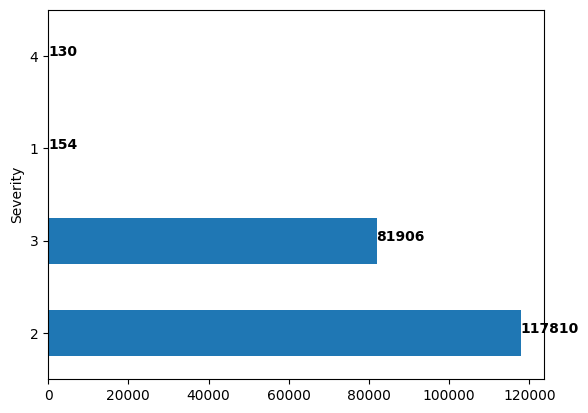

In [17]:
#5. Severity and Types of Accidents:
#What types or severity of accidents were most common?

import matplotlib.pyplot as plt

severity_counts = car_crash_df['Severity'].value_counts()

ax = severity_counts.plot(kind='barh')

for i, v in enumerate(severity_counts):
    ax.text(v + 10, i, str(v), color='black', fontweight='bold')

plt.show()


In [16]:
car_crash_df['Severity'].value_counts() 

Severity
2    117810
3     81906
1       154
4       130
Name: count, dtype: int64

Research Questions

1. Geographic Factors:
What are known hotspot locations for highway accidents?
Which States had the most traffic accidents, and was this influenced more by population size of the State or weather patterns or by some other unknown factor?
2. Temporal Factors:
Since the data was collected between 2016-2023, what impact did Covid-19 have on traffic accidents?
Did holidays or certain days/seasons lead to more accidents?
Which years have car accidents seemed to improve or decrease in percentage?
3. Vehicle-Related Factors:
Are certain car manufacturers involved in more accidents than others?
Have car accidents decreased since 2016, with the increase of technology and car manufacturing safety?
Have car accident casualties decreased since 2016 with the increase in car manufacturing safety?
4. Socioeconomic and Demographic Factors:
Do various areas with low socioeconomic status and income affect car accidents in any way? (correlation between the amount or severity of accidents and income/demographics)
FRED API - did unemployment have a positive or negative correlation with car accidents?
5. Severity and Types of Accidents:
What types or severity of accidents were most common?
6. Regional Improvements:
Which areas have improved the most since 2016 at decreasing the rate of car accidents?
